## Diseño de la función objetivo que evalua la aptitud basada en la cobertura de incertidumbre de $n' \in N$ sensores 

In [578]:
#Cargando librerías 

import importlib
import positioning_sensors as ps
importlib.reload(ps)

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np


plt.style.use("ggplot")

 W = i*a^(p)


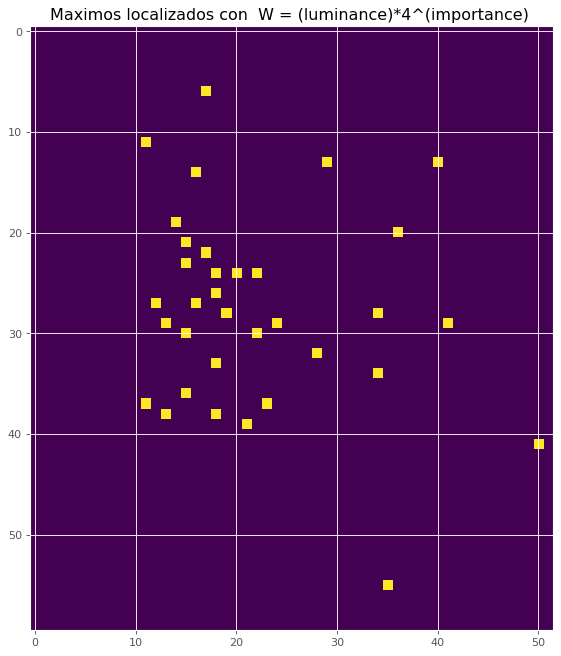

In [579]:
#cargamos imagenes en luminance e importance
ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'
sigma_y = 0.5
sigma_x = 0.5
sigma = [sigma_y,sigma_x]

luminance = ps.readIMG(ilumina)
importance = ps.readIMG(niveles,invert=True)

nonsat = ps.desaturate(luminance,th=62)
nonsat = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')

W1 = ps.f5(nonsat,importance)
seeds = ps.getMax(W1)

seeds_nonsat = ps.getMax(nonsat)
coords_nonsat = ps.get_coords(seeds_nonsat)

plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(seeds*np.max(W1)/2+W1)
plt.imshow(seeds)
plt.title("Maximos localizados con  W = (luminance)*4^(importance) ")
plt.show()

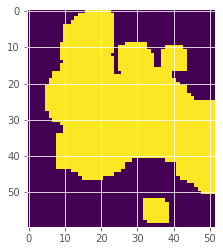

In [581]:
seeds_nonsat = nonsat>0
plt.imshow(seeds_nonsat)
coords = ps.get_coords(seeds)

In [582]:
variogram3, varmask3 ,locations3 = ps.computeRegions(nonsat,coords,th = 0.5 ,atol=15,direction_delta = 2,verbose = True)

Coords  [ 6 17]
--
Coords  [11 11]
--
Coords  [13 29]
--
Coords  [13 40]
--
Coords  [14 16]
--
Coords  [19 14]
--
Coords  [20 36]
--
Coords  [21 15]
--
Coords  [22 17]
--
Coords  [23 15]
--
Coords  [24 18]
--
Coords  [24 20]
--
Coords  [24 22]
--
Coords  [26 18]
--
Coords  [27 12]
--
Coords  [27 16]
--
Coords  [28 19]
--
Coords  [28 34]
--
Coords  [29 13]
--
Coords  [29 24]
--
Coords  [29 41]
--
Coords  [30 15]
--
Coords  [30 22]
--
Coords  [32 28]
--
Coords  [33 18]
--
Coords  [34 34]
--
Coords  [36 15]
--
Coords  [37 11]
--
Coords  [37 23]
--
Coords  [38 13]
--
Coords  [38 18]
--
Coords  [39 21]
--
Coords  [41 50]
--
Coords  [55 35]
--


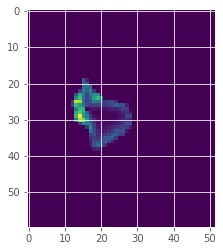

In [600]:
m1 =(varmask3[15])
plt.imshow(m1)

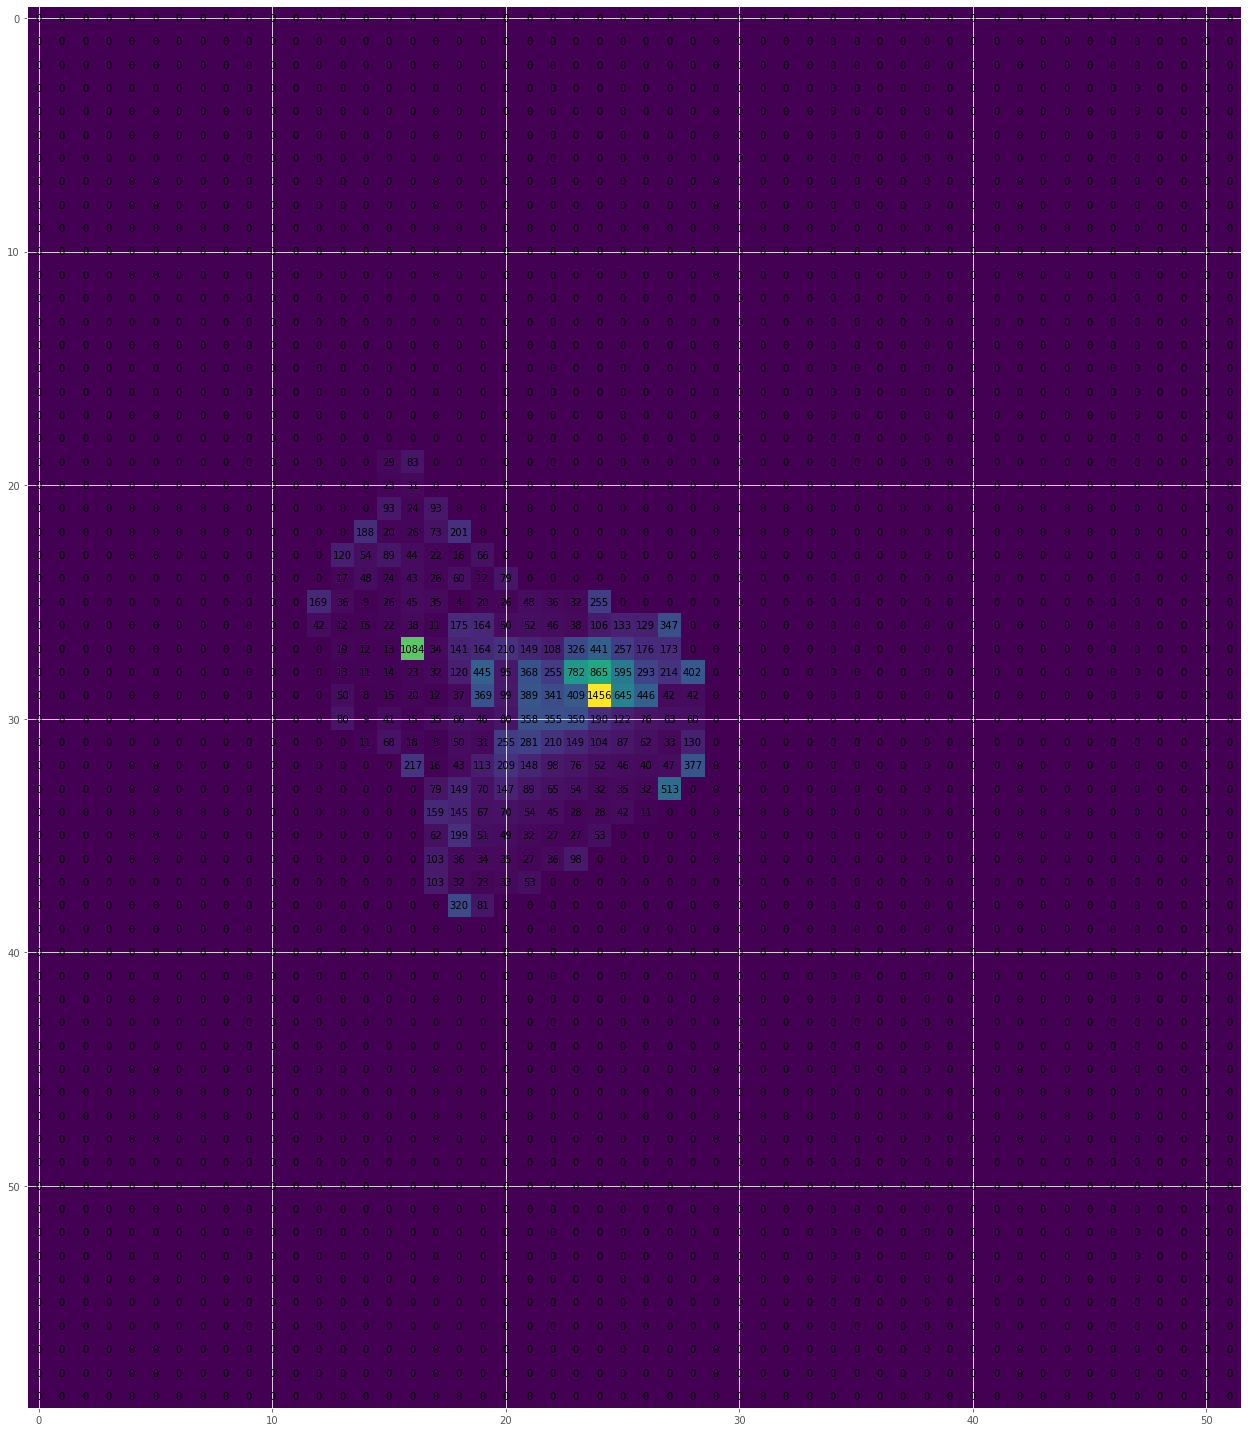

In [602]:
img = m1
img = W1*(img>0)
img = (1/(1+m1))*(m1>0)*W1
fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(img)
for i in range((img.shape[0])):
    for j in range(img.shape[1]):
        text = ax.text(j, i, int(img[i, j]),
                       ha="center", va="center", color="black")

#plt.figure(figsize=(10, 10), dpi=80)
fig.tight_layout()
plt.show()

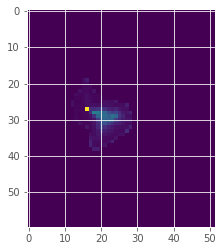

In [596]:
plt.imshow((1/(1+m1))*(m1>0))

In [264]:
#searching and verifying valid coordinates 
#searching and verifying valid coordinates 

def validate_coordinates(iy,ix):
    iy = np.where(coords[:,0]==iy)
    ix = np.where(coords[:,1]==ix)

    ix = np.intersect1d(ix,iy)
    return ix

In [386]:
def aptitude(X,nonsat=nonsat,varmask=varmask,only_aptitude=True):
    
    
    n_sensors = int(len(X)/2)
    sensor_list = X.reshape(n_sensors,len(nonsat.shape))
    

    coverage = np.zeros((n_sensors,nonsat.shape[0],nonsat.shape[1]))
    
    for i,s in enumerate(sensor_list):

        sy = s[0]
        sx = s[1]
        ix = validate_coordinates(sy,sx)
 

        if len(ix)>0:
            coverage[i] = varmask[ix]
        else:
            coverage[i] = np.zeros(nonsat.shape)
            
    res = np.zeros(nonsat.shape)
    
    for s in coverage:
        res = res+s*(nonsat>0)*W1

 
    return -np.sum(res>0)

                    
def mapa(X,nonsat=nonsat,varmask=varmask,only_aptitude=True):
    
    
    n_sensors = int(len(X)/2)
    sensor_list = X.reshape(n_sensors,len(nonsat.shape))
    

    coverage = np.zeros((n_sensors,nonsat.shape[0],nonsat.shape[1]))
    
    for i,s in enumerate(sensor_list):

        sy = s[0]
        sx = s[1]
        ix = validate_coordinates(sy,sx)
 

        if len(ix)>0:
            coverage[i] = varmask[ix]
        else:
            coverage[i] = np.zeros(nonsat.shape)
            
    res = np.zeros(nonsat.shape)
    
    for s in coverage:
        res = res+s*(nonsat>0)*W1

 
    return res>0    
    

In [351]:
n_sensors = 4
X = np.array([np.random.randint(nonsat.shape) for i in np.arange(n_sensors)]).flatten()

print("testing solution:", X)


a = aptitude(X,only_aptitude=True) 

type(X)

testing solution: [52  8 23 36 50 24 11 32]


numpy.ndarray

[36  8]
[1137]
[ 9 46]
[]
[13 34]
[245]
[46 51]
[1513]


Text(0.5, 1.0, '53')

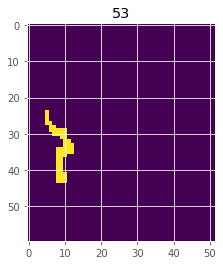

In [156]:


sensor_list = [np.random.randint(nonsat.shape) for i in np.arange(n_sensors)]

a = np.zeros(nonsat.shape)


coverage = np.zeros((n_sensors,nonsat.shape[0],nonsat.shape[1]))

for i,s in enumerate(sensor_list):
    print(s)
                
    sy = s[0]
    sx = s[1]
    penalty = 0

    ix = validate_coordinates(iy,ix)
    print(ix)
    if len(ix)>0:
        coverage[i] = varmask[ix]
    else:
        coverage[i] = np.zeros(nonsat.shape)    

    
sum_coverage = ((coverage[0]+coverage[1])>0)*(nonsat>0)
plt.imshow(sum_coverage)
plt.title(np.sum(sum_coverage))

## Proof of concept: Svolving Light Pollution Sensor Location

In [610]:
#!pip install geneticalgorithm

In [612]:
# generating the boundaries for each sensor location from a total of 4
varbound=np.array([[0,nonsat.shape[0]],[0,nonsat.shape[1]],[0,nonsat.shape[0]],[0,nonsat.shape[1]],[0,nonsat.shape[0]],[0,nonsat.shape[1]],[0,nonsat.shape[0]],[0,nonsat.shape[1]]])
varbound

array([[ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52],
       [ 0, 60],
       [ 0, 52]])

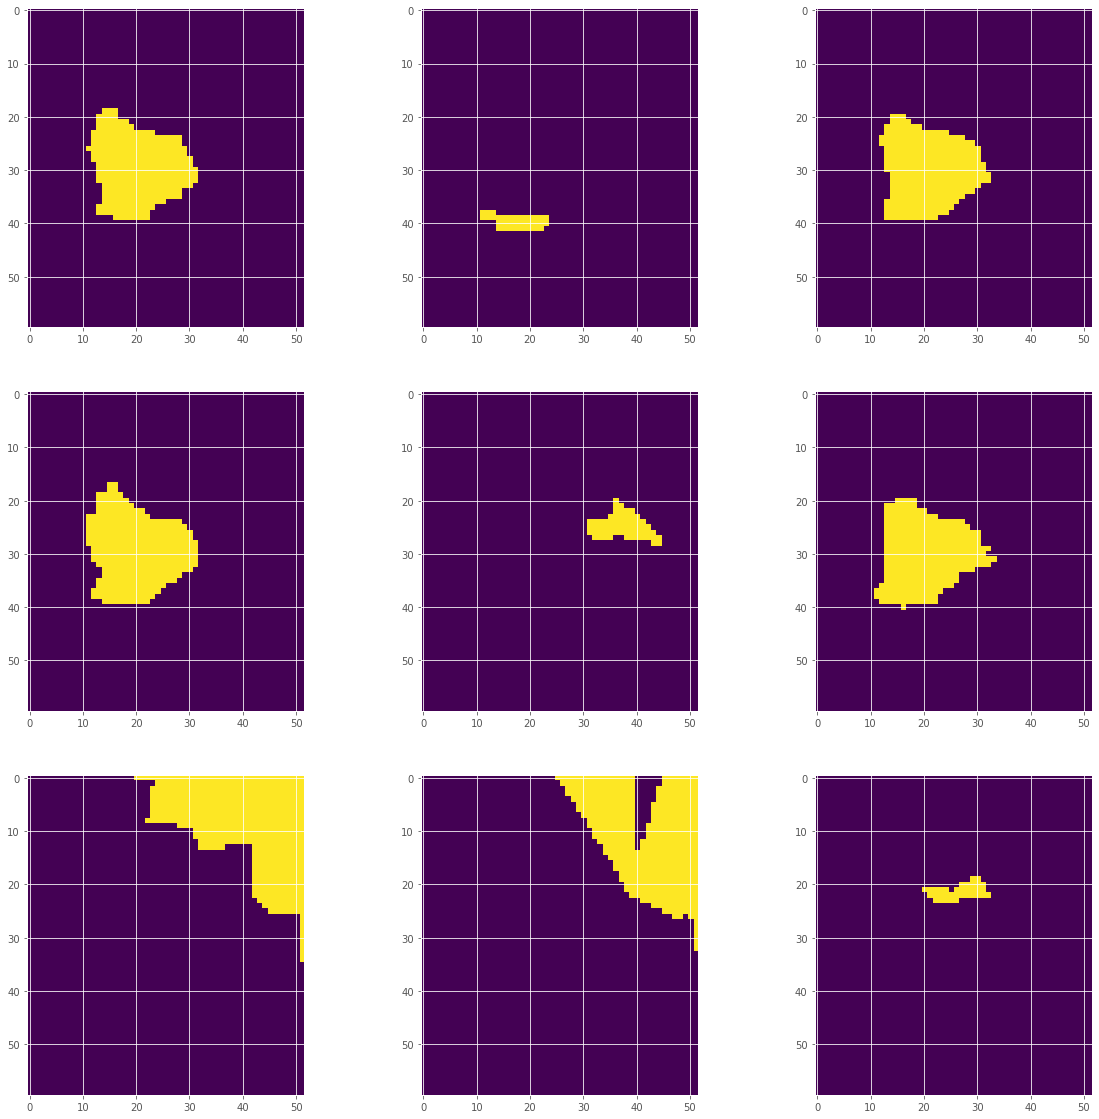

In [633]:
# for each locations, we have an associated region of minimum spatial variance. 

selected_locations = [np.random.randint((len(varmask))) for i in np.arange(9)]

fig, axs = plt.subplots(3, 3,figsize=(20,20))

for i,s in enumerate(selected_locations):
    sploty = i%3
    splotx = int(i/3)
    axs[sploty, splotx].imshow(varmask[s]>0)

plt.show()

 The best solution found:                                                                           
 [37. 11. 41. 50. 37. 23. 34. 34.]

 Objective function:
 -203.0


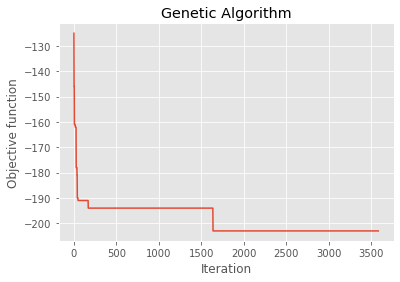

In [632]:
from geneticalgorithm import geneticalgorithm as ga

dim = len(varbound)

model=ga(function=aptitude,dimension=dim,variable_type='int',variable_boundaries=varbound)

model.run()
    

array([39., 36., 18., 37., 28., 32., 33., 15.])

In [388]:
X = np.array([45., 39., 13.,  5.])
X = np.array([np.random.randint(nonsat.shape) for i in np.arange(2)]).flatten()
X = model.output_dict["variable"]
X
    

array([39., 36., 33., 15., 28., 32.,  9., 30.])

In [389]:
aptitude(X)

-763

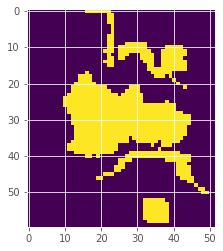

In [393]:
plt.imshow(mapa(X))

In [394]:
for p in X.reshape(4,2):

    nonsat[int(p[0])][int(p[1])]+=100

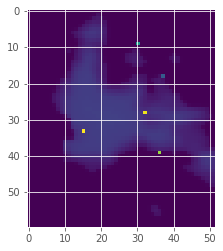

In [395]:
plt.imshow(nonsat)

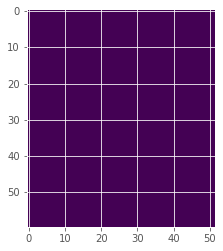

In [407]:
import pandas as pd

plt.imshow(variogram[50])

In [408]:

df = pd.DataFrame(varmask)

ValueError: Must pass 2-d input. shape=(1584, 60, 52)

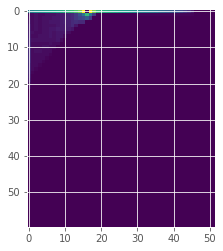

In [412]:
plt.imshow(varmask[0])

In [495]:
#flattenizing

fvm = [varmask[i].flatten() for i in range(len(varmask))]


In [496]:
#storing in data frame
df = pd.DataFrame(fvm)

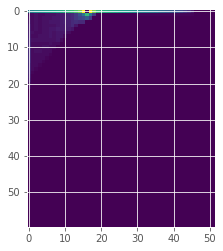

In [497]:
#deflaterizing
varmask_example = np.array(df.iloc[0][:]).reshape(nonsat.shape)
plt.imshow(varmask_example)

In [498]:
c= np.array([ps.get_coords(locations[i]) for i in range(len(locations)) ])
cf = c.flatten()
coords = cf.reshape(len(locations),2)
df.insert(0,"coordsy", coords[:,0])
df.insert(1,"coordsx", coords[:,1])

In [499]:
df

,coordsy,coordsx,0,1,2,3,4,5,6,7,...,3110,3111,3112,3113,3114,3115,3116,3117,3118,3119
0,0,16,29.0,30.0,33.0,34.0,35.0,36.0,37.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,17,28.0,29.0,30.0,33.0,34.0,35.0,36.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,18,27.0,28.0,29.0,30.0,33.0,34.0,35.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,19,26.0,27.0,28.0,29.0,30.0,33.0,34.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,20,24.0,26.0,27.0,28.0,29.0,30.0,33.0,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,58,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,35.0,34.0,33.0,32.0,31.0,31.0,29.0,28.0,27.0
1580,58,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.0,36.0,35.0,34.0,33.0,32.0,31.0,31.0,29.0,28.0
1581,58,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.0,37.0,36.0,35.0,34.0,33.0,32.0,31.0,31.0,29.0
1582,58,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.0,37.0,37.0,36.0,35.0,34.0,33.0,32.0,31.0,31.0


In [500]:
df.to_csv("allcoversnonsatat15percent.csv")

In [484]:
df

,0,coordsx,coordsy,1,2,3,4,5,6,7,...,3110,3111,3112,3113,3114,3115,3116,3117,3118,3119
0,29.0,16,0,30.0,33.0,34.0,35.0,36.0,37.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28.0,17,0,29.0,30.0,33.0,34.0,35.0,36.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27.0,18,0,28.0,29.0,30.0,33.0,34.0,35.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,19,0,27.0,28.0,29.0,30.0,33.0,34.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24.0,20,0,26.0,27.0,28.0,29.0,30.0,33.0,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,0.0,34,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,35.0,34.0,33.0,32.0,31.0,31.0,29.0,28.0,27.0
1580,0.0,35,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.0,36.0,35.0,34.0,33.0,32.0,31.0,31.0,29.0,28.0
1581,0.0,36,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.0,37.0,36.0,35.0,34.0,33.0,32.0,31.0,31.0,29.0
1582,0.0,37,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.0,37.0,37.0,36.0,35.0,34.0,33.0,32.0,31.0,31.0


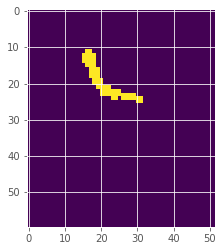

In [608]:
plt.imshow(varmask[500]>0)

$$\sum_{W}_i^{j}(\frac{1}{1/(1+var_i)})$$